In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

from scipy.io import wavfile
from IPython.core.display import HTML

In [2]:
def wavPlayer(filepath):
    """ will display html 5 player for compatible browser

    Parameters :
    ------------
    filepath : relative filepath with respect to the notebook directory ( where the .ipynb are not cwd)
               of the file to play

    The browser need to know how to play wav through html5.

    there is no autoplay to prevent file playing when the browser opens
    """
    
    src = """
    <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <title>Simple Test</title>
    </head>
    
    <body>
    <audio controls="controls" style="width:600px" >
      <source src="files/%s" type="audio/wav" />
      Your browser does not support the audio element.
    </audio>
    </body>
    """%(filepath)
    display(HTML(src))

In [3]:
raw = np.load("rec1.npz")["raw"]
raw.shape

(2, 1048572)

In [4]:
np.mean(raw[0]), np.mean(raw[1])

(2168.6363883452923, 2201.42990085564)

<IPython.core.display.Javascript object>


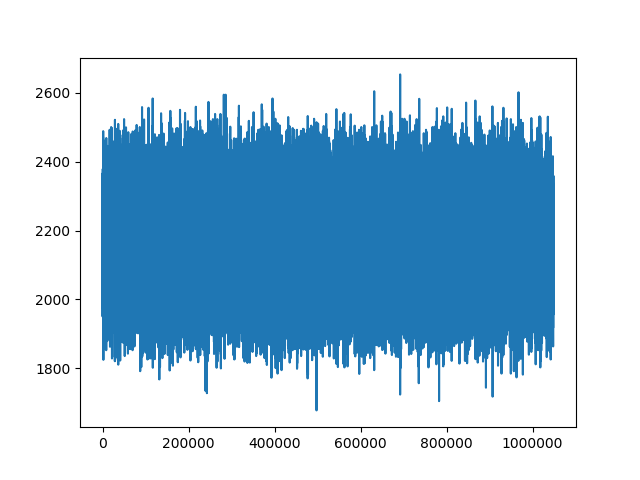

(<Figure size 640x480 with 1 Axes>,
 [<matplotlib.lines.Line2D at 0x7fbe8f64db38>])

In [5]:
plt.figure(1), plt.plot(raw[0])

In [6]:
N = raw.shape[1]
Fs = 250000
T = float(N) / Fs
iq = raw[1] + 1j * raw[0]
iq_f = np.fft.fft(iq)
freqs = np.fft.fftfreq(N, 1.0/Fs)
fbase = 1406250

<IPython.core.display.Javascript object>


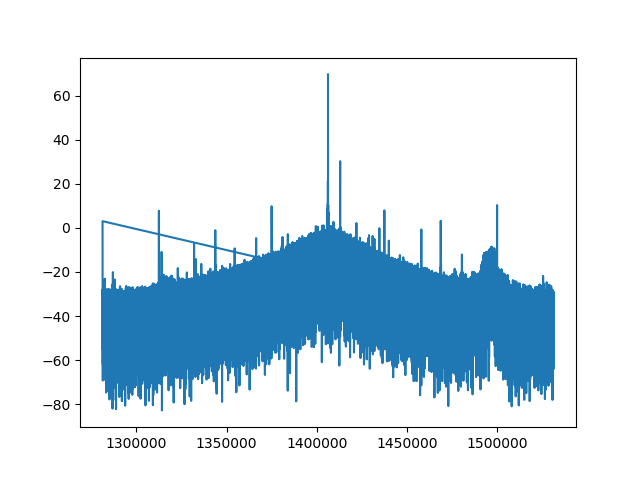

(<Figure size 640x480 with 1 Axes>,
 [<matplotlib.lines.Line2D at 0x7fbe8ee12d30>])

In [7]:
plt.figure(2), plt.plot(freqs + fbase, 20*np.log10(np.abs(iq_f)/N))

In [8]:
ftune = 1412990
fdelta = ftune - fbase
t = np.linspace(0, T, N)
xdelta = np.exp(-2j*np.pi*fdelta*t)
iqmixed = xdelta * iq
Qdecimate = 31
Fsdown = Fs/Qdecimate
Ndown = int(N/Qdecimate + 0.5)
iqdown = signal.decimate(iqmixed, Qdecimate)
freqs_down = np.fft.fftfreq(Ndown, 1.0/Fsdown)
tdown = np.linspace(0, T, Ndown)

<IPython.core.display.Javascript object>


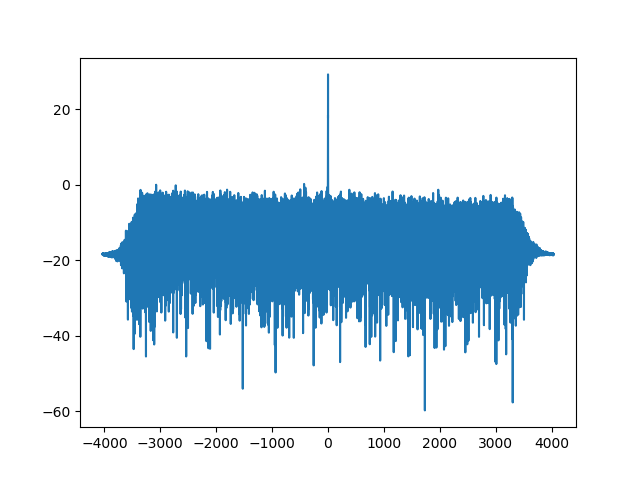

(<Figure size 640x480 with 1 Axes>,
 [<matplotlib.lines.Line2D at 0x7fbe8edd0080>])

In [9]:
iqdownmixed_f = np.fft.fft(iqdown)
plt.figure(3), plt.plot(freqs_down, 20*np.log10(np.abs(iqdownmixed_f)/Ndown))

<IPython.core.display.Javascript object>


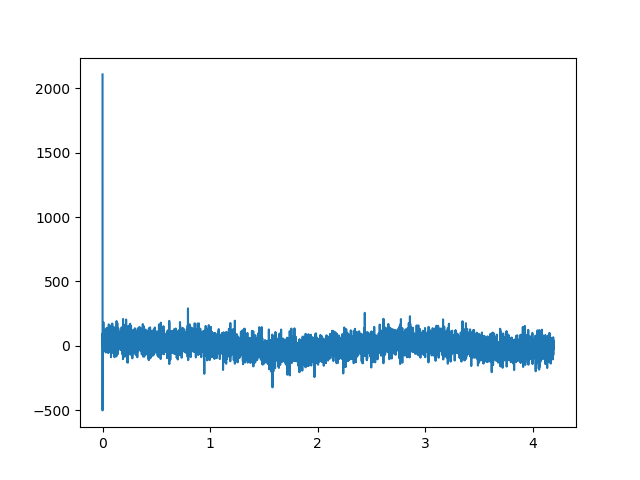

(<Figure size 640x480 with 1 Axes>,
 [<matplotlib.lines.Line2D at 0x7fbe8ed78d68>])

In [10]:
plt.figure(4), plt.plot(tdown, iqdown.real)

In [11]:
audio_data = iqdown.real * (2**16)
wavfile.write("audio.wav", 8000, audio_data.astype(np.int16))